In [1]:
import numpy as np
import pandas as pd

#### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index ?

In [2]:
# can we have multiple index ?Lets try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('cse',2019),('cse',2020),('cse',2021),('cse',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)

In [3]:
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(cse, 2019)    5
(cse, 2020)    6
(cse, 2021)    7
(cse, 2022)    8
dtype: int64

In [4]:
# Try fetching values of all cse
a['cse']

KeyError: 'cse'

In [5]:
# The solution -> multiindex series (also known as hirarchial indexing)
# multiple index levels within a single index

In [7]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [8]:
# level inside multiindex object

In [9]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [10]:
# how to fetch items from such a series
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [ ]:
# a logical question to ask

In [11]:
# unstack
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [12]:
# stack
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# multiindex dataframe

In [13]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [14]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [15]:
# Are columns really different from index?

In [16]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [17]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [18]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

#### Stacking and Unstacking

In [21]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [19]:
branch_df3.stack().stack()

/var/folders/2n/v2zy3n991d94k9g19pvh8k5m0000gn/T/ipykernel_4231/4023844418.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

#### Working with multiindex dataframes

In [22]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 632.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [23]:
# Extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [24]:
# multiple
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [25]:
#using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [26]:
#extracting cols
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [27]:
#extracting cols
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [28]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [29]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [30]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True])
branch_df3.sort_index(level=0,ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [31]:
# multiindex dataframe(col) -> transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [32]:
# swaplevel
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

Wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.

Long format is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

#### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Female,18.056897
Male,20.744076


In [8]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker         No        Yes
sex                         
Female  18.105185  17.977879
Male    19.791237  22.284500

In [9]:
# this is where pivot table comes handy instead of using the groupby syntax.
# by default mean function is applied to total_bill
df.pivot_table(index='sex',columns='smoker',values='total_bill')

smoker,No,Yes
sex,,
Female,18.105185,17.977879
Male,19.791237,22.284500


In [10]:
#aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

smoker,No,Yes
sex,,
Female,977.68,593.27
Male,1919.75,1337.07


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [20]:
# all cols together
df.pivot_table(index='sex',columns='smoker',values=['total_bill','size','tip'])

size                 tip           total_bill           
smoker        No       Yes        No       Yes         No        Yes
sex                                                                 
Female  2.592593  2.242424  2.773519  2.931515  18.105185  17.977879
Male    2.711340  2.500000  3.113402  3.051167  19.791237  22.284500

In [21]:
#multi dimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                                   tip  \
day              Fri                 Sat       Sun   Thur              Fri   
time          Dinner     Lunch    Dinner    Dinner Dinner     Lunch Dinner   
sex    smoker                                                                
Female No        2.0  3.000000  2.307692  3.071429    2.0  2.500000   3.25   
       Yes       2.0  2.000000  2.200000  2.500000    NaN  2.428571   4.30   
Male   No        2.0       NaN  2.656250  2.883721    NaN  2.500000   3.50   
       Yes       2.4  1.666667  2.629630  2.600000    NaN  2.300000   4.73   

                                               total_bill                 \
day                    Sat    Sun   Thur              Fri            Sat   
time          Lunch Dinner Dinner Dinner Lunch     Dinner  Lunch  Dinner   
sex    smoker                                                              
Female No      3.00   4.67    5.2    3.0  5.17      22.75  15.98  247.05   
       Yes     3.48   6.50    4.0    NaN  5.00      48.80  39.78  304.00   
Male   No       NaN   9.00    6.0    NaN  6.70      34.95    NaN  637.73   
       Yes     2.20  10.00    6.5    NaN  5.00     129.46  34.16  589.62   

                                      
day               Sun   Thur          
time           Dinner Dinner   Lunch  
sex    smoker                         
Female No      291.54  18.78  381.58  
       Yes      66.16    NaN  134.53  
Male   No      877.34    NaN  369.73  
       Yes     392.12    NaN  191.71

In [22]:
#multi dimensional ,along with margins
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

size                                                 \
day                 Fri                 Sat       Sun   Thur             
time             Dinner     Lunch    Dinner    Dinner Dinner     Lunch   
sex    smoker                                                            
Female No      2.000000  3.000000  2.307692  3.071429    2.0  2.500000   
       Yes     2.000000  2.000000  2.200000  2.500000    NaN  2.428571   
Male   No      2.000000       NaN  2.656250  2.883721    NaN  2.500000   
       Yes     2.400000  1.666667  2.629630  2.600000    NaN  2.300000   
All            2.166667  2.000000  2.517241  2.842105    2.0  2.459016   

                           tip               ...                     \
day                 All    Fri          Sat  ...   Thur         All   
time                    Dinner Lunch Dinner  ... Dinner Lunch         
sex    smoker                                ...                      
Female No      2.592593   3.25  3.00   4.67  ...    3.0  5.17   5.2   
       Yes     2.242424   4.30  3.48   6.50  ...    NaN  5.00   6.5   
Male   No      2.711340   3.50   NaN   9.00  ...    NaN  6.70   9.0   
       Yes     2.500000   4.73  2.20  10.00  ...    NaN  5.00  10.0   
All            2.569672   4.73  3.48  10.00  ...    3.0  6.70  10.0   

              total_bill                                                    
day                  Fri             Sat      Sun   Thur               All  
time              Dinner  Lunch   Dinner   Dinner Dinner    Lunch           
sex    smoker                                                               
Female No          22.75  15.98   247.05   291.54  18.78   381.58   977.68  
       Yes         48.80  39.78   304.00    66.16    NaN   134.53   593.27  
Male   No          34.95    NaN   637.73   877.34    NaN   369.73  1919.75  
       Yes        129.46  34.16   589.62   392.12    NaN   191.71  1337.07  
All               235.96  89.92  1778.40  1627.16  18.78  1077.55  4827.77  

[5 rows x 21 columns]

In [23]:
#margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,No,Yes,All
sex,,,
Female,977.68,593.27,1570.95
Male,1919.75,1337.07,3256.82
All,2897.43,1930.34,4827.77


In [24]:
#plotting graphs
df = pd.read_csv('data/expense_data.csv')

In [25]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [26]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [30]:
df['month'] = df['Date'].dt.month_name()

In [31]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

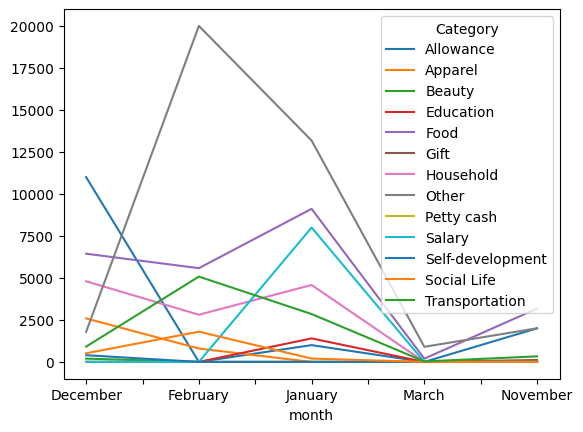

In [32]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

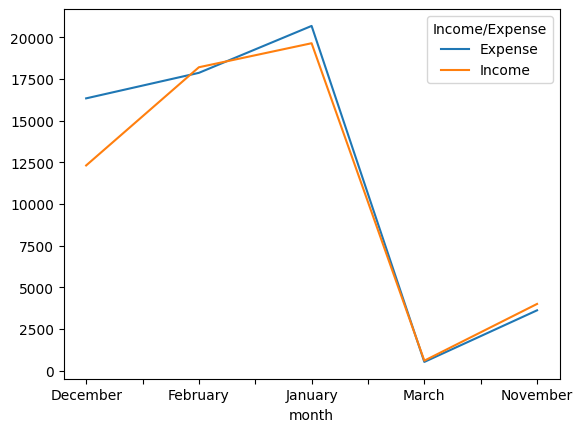

In [33]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

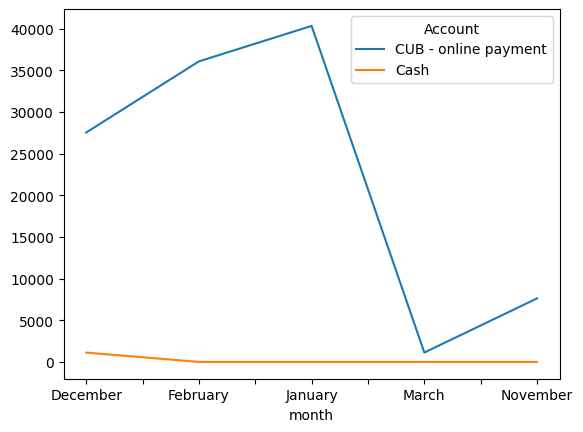

In [34]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()